<a href="https://colab.research.google.com/github/Imran-co/Machine-Intelligence/blob/main/MIL_4_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes

df = load_diabetes()
df = pd.DataFrame(df.data, columns=df.feature_names)

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [23]:
data = load_diabetes()

X = data['data']

y = data['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (442, 10)
Target shape: (442,)


In [24]:
from sklearn.model_selection import train_test_split

X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
#Ridge
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train,y_train)

Ridge()

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train,y_train)

Lasso()

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train,y_train)

ElasticNet()

In [25]:
from sklearn.model_selection import GridSearchCV

grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [27]:
grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [28]:
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, grid, scoring='neg_mean_squared_error', cv=5)
grid_search_ridge.fit(X_train, y_train)
print(f"Best alpha for Ridge: {grid_search_ridge.best_params_['alpha']}")

Best alpha for Ridge: 0.01


In [29]:
lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, grid, scoring='neg_mean_squared_error', cv=5)
grid_search_lasso.fit(X_train, y_train)
print(f"Best alpha for Lasso: {grid_search_lasso.best_params_['alpha']}")

Best alpha for Lasso: 0.1


In [30]:
elastic_net = ElasticNet()
grid_search_elastic_net = GridSearchCV(elastic_net, grid, scoring='neg_mean_squared_error', cv=5)
grid_search_elastic_net.fit(X_train, y_train)
print(f"Best alpha for ElasticNet: {grid_search_elastic_net.best_params_['alpha']}")

Best alpha for ElasticNet: 0.01


In [31]:
from sklearn.metrics import mean_squared_error, r2_score


models = ['Ridge', 'Lasso', 'ElasticNet']
predictions = [grid_search_ridge, grid_search_lasso, grid_search_elastic_net]

for model, prediction in zip(models, predictions):
  y_prediction = prediction.predict(X_test)
  mse = mean_squared_error(y_test, y_prediction)
  r2 = r2_score(y_test, y_prediction)
  print(f"{model}:")
  print(f"  MSE: {mse:.4f}")
  print(f"  R-squared: {r2:.4f}")

Ridge:
  MSE: 3142.3318
  R-squared: 0.4829
Lasso:
  MSE: 3184.4967
  R-squared: 0.4759
ElasticNet:
  MSE: 3986.9526
  R-squared: 0.3439


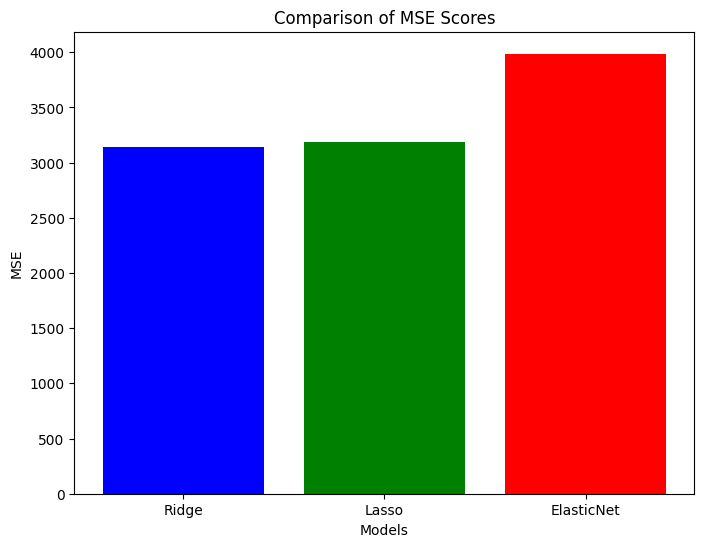

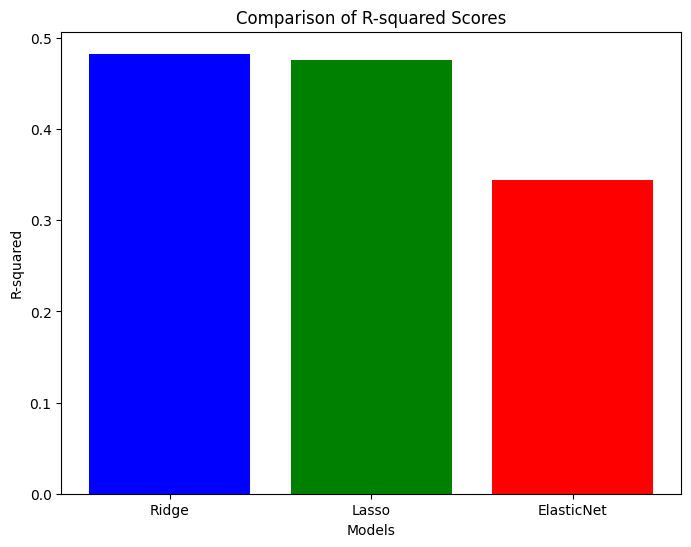

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and metrics
models = ['Ridge', 'Lasso', 'ElasticNet']
mse_scores = [
    mean_squared_error(y_test, grid_search_ridge.predict(X_test)),
    mean_squared_error(y_test, grid_search_lasso.predict(X_test)),
    mean_squared_error(y_test, grid_search_elastic_net.predict(X_test))
]
r2_scores = [
    r2_score(y_test, grid_search_ridge.predict(X_test)),
    r2_score(y_test, grid_search_lasso.predict(X_test)),
    r2_score(y_test, grid_search_elastic_net.predict(X_test))
]

# Bar chart for MSE
plt.figure(figsize=(8, 6))
plt.bar(models, mse_scores, color=['blue', 'green', 'red'])
plt.title('Comparison of MSE Scores')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()

# Bar chart for R-squared
plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, color=['blue', 'green', 'red'])
plt.title('Comparison of R-squared Scores')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.show()